# Decomposition of the Treasury Yield Curve Using Principal Component Analysis (PCA)
## Introduction
The Treasury yield curve represents the yields on government bonds at different maturities. It is a critical tool for understanding market expectations about future interest rates, inflation, and economic growth. The shape of the yield curve, often described in terms of its level, slope, and curvature, can provide valuable information on macroeconomic conditions.

In this project, we use Principal Component Analysis (PCA) to decompose the Treasury yield curve into its primary factors. The goal is to identify and analyze the underlying components that explain the majority of the variance in the yield curve.

### 1. Data Collection Section:
You can fetch the Treasury yield curve data from the FRED API using the fredapi library in Python.

In [4]:
# Import necessary libraries
import pandas as pd
from fredapi import Fred

# Set up FRED API key
api_key = '060213f8f9bc0f09d86c251b43f3e1dc'
fred = Fred(api_key=api_key)

# Fetch historical Treasury yield data for 1-year, 5-year, and 10-year bonds
treasury_data = {
    '1-Year': fred.get_series('DGS1'),
    '5-Year': fred.get_series('DGS5'),
    '10-Year': fred.get_series('DGS10')
}

# Convert to a DataFrame
df_yield = pd.DataFrame(treasury_data)
df_yield.dropna(inplace=True)  # Drop rows with missing data

# Preview the data
df_yield.head()

,1-Year,5-Year,10-Year
1962-01-02,3.22,3.88,4.06
1962-01-03,3.24,3.87,4.03
1962-01-04,3.24,3.86,3.99
1962-01-05,3.26,3.89,4.02
1962-01-08,3.31,3.91,4.03


### 2. Data Preprocessing Section:
Ensure the data is properly aligned and scaled before applying PCA.

In [5]:
# Normalize the data (mean = 0, standard deviation = 1)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_yield)

# Convert back to DataFrame for readability
df_scaled = pd.DataFrame(scaled_data, columns=df_yield.columns, index=df_yield.index)
df_scaled.head()

,1-Year,5-Year,10-Year
1962-01-02,-0.495829,-0.521900,-0.605130
1962-01-03,-0.489936,-0.525066,-0.615256
1962-01-04,-0.489936,-0.528231,-0.628756
1962-01-05,-0.484044,-0.518734,-0.618631
1962-01-08,-0.469313,-0.512403,-0.615256


### 3. Applying PCA Section:
Perform PCA and extract the principal components.

In [6]:
from sklearn.decomposition import PCA
import numpy as np

# Apply PCA
pca = PCA()
pca.fit(df_scaled)

# Extract the principal components
pca_components = pca.transform(df_scaled)

# Convert to DataFrame
df_pca = pd.DataFrame(pca_components, index=df_scaled.index, 
                      columns=[f'PC{i+1}' for i in range(df_scaled.shape[1])])

# Variance explained by each component
explained_variance = pca.explained_variance_ratio_

df_pca.head()

,PC1,PC2,PC3
1962-01-02,-0.937023,0.066283,0.044736
1962-01-03,-0.941335,0.077506,0.046388
1962-01-04,-0.950968,0.086144,0.051376
1962-01-05,-0.936220,0.083022,0.051829
1962-01-08,-0.922150,0.091404,0.051331


### 4. Visualizing the Components:
Create visualizations for the PCA components and their explained variance.

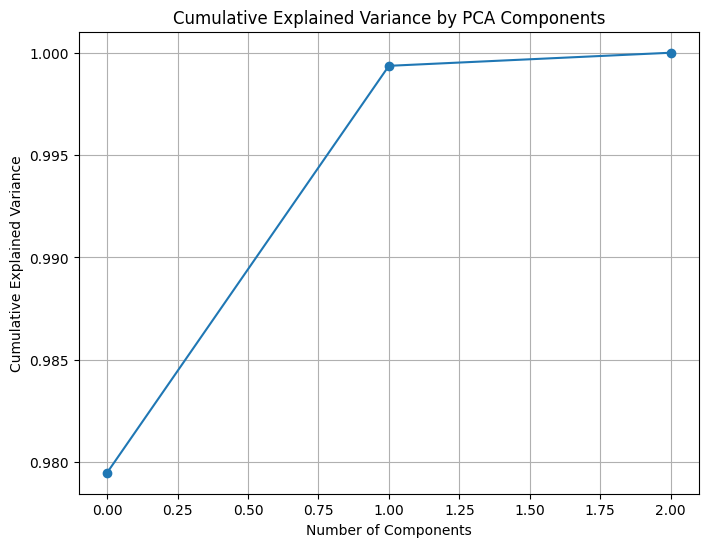

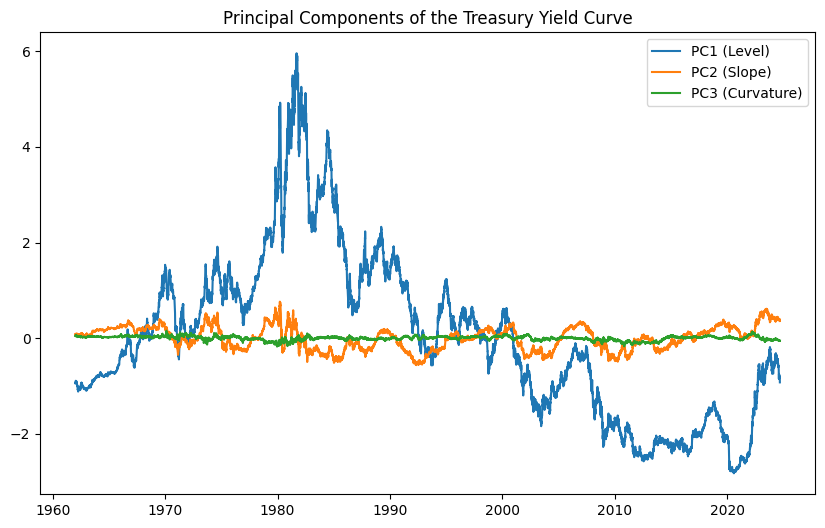

In [7]:
import matplotlib.pyplot as plt

# Scree plot to visualize explained variance
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Plot the principal components (PC1, PC2, PC3)
plt.figure(figsize=(10,6))
plt.plot(df_pca['PC1'], label='PC1 (Level)')
plt.plot(df_pca['PC2'], label='PC2 (Slope)')
plt.plot(df_pca['PC3'], label='PC3 (Curvature)')
plt.legend()
plt.title('Principal Components of the Treasury Yield Curve')
plt.show()

### Analysis of the Principal Components of the Treasury Yield Curve:

The graph offers valuable insights into how different factors influence the Treasury yield curve over time, particularly how the level, slope, and curvature evolved in response to macroeconomic events. Below is an interpretation of each principal component and the major patterns seen in the graph.

---

### **1. PC1 (Level) – Overall Shift in the Yield Curve**

- **Overview**: The first principal component (PC1), shown in blue, represents the **level** of the yield curve. It reflects parallel shifts in yields across all maturities.
  
- **Key Insights**:
    - The sharp rise in the late 1970s and early 1980s corresponds to the **high-inflation period** in the U.S., where the Federal Reserve raised interest rates aggressively to combat inflation. This is commonly referred to as the **Volcker Shock**, named after Fed Chairman Paul Volcker.
    - During this period, the level component spiked as interest rates reached historical highs, driving yields across all maturities upward.
    - Post-1980, we see a steady decline in PC1, reflecting a **long-term decline in interest rates**, consistent with the period of **Great Moderation** (1980s-2000s), where inflation remained low, and the Fed maintained a more stable interest rate policy.
    - After the **Global Financial Crisis (2008)**, the level remained subdued due to the Fed's zero interest rate policy and quantitative easing (QE), pushing yields across maturities to historically low levels.
    - The recent spike seen towards the end of the graph reflects the **COVID-19 pandemic** and the subsequent period of rising inflation, which prompted central banks to raise interest rates sharply.

- **Takeaway**: PC1 explains the general **trend and shifts in interest rates** due to economic conditions, inflation expectations, and monetary policy. This component typically accounts for the majority of the variance in the yield curve.

---

### **2. PC2 (Slope) – Difference Between Short- and Long-Term Rates**

- **Overview**: The second principal component (PC2), represented by the orange line, captures the **slope** of the yield curve. The slope is the difference between long-term and short-term yields, and it reflects expectations about future economic growth.

- **Key Insights**:
    - Positive spikes in PC2 indicate a **steepening yield curve**, which often happens during periods of **economic recovery** or when central banks are cutting short-term rates to stimulate the economy. For example, steepening occurred after the early 1980s recession and in the years following the **dot-com bubble burst** (2000-2001).
    - Negative values, where the curve **inverts**, are seen before **recessionary periods**. An inverted yield curve is a classic signal of economic contraction, where short-term rates rise above long-term rates. This can be seen leading up to the **Global Financial Crisis in 2007-2008** and in the **early 2000s** following the dot-com crash.
    - The recent behavior of PC2 shows a slight negative movement towards the present day, potentially indicating flattening or inverted yield curves, which often occur during uncertain economic periods.

- **Takeaway**: PC2 provides insight into the **economic cycle**. An inverted yield curve is often viewed as a leading indicator of recession, while a steep yield curve points to future economic growth.

---

### **3. PC3 (Curvature) – Non-Linear Movements in the Yield Curve**

- **Overview**: The third principal component (PC3), shown in green, represents the **curvature** of the yield curve. Curvature captures the shape of the yield curve, particularly when medium-term rates diverge from both short-term and long-term rates.

- **Key Insights**:
    - The magnitude of PC3 is relatively small compared to PC1 and PC2, indicating that non-linear shifts in the yield curve are less significant but still important for understanding certain periods.
    - Curvature changes are often observed in **mid-cycle periods**, when monetary policy is transitioning, and market expectations about inflation or growth are mixed.
    - Periods of positive curvature (humps in the middle of the yield curve) may indicate **increased uncertainty** about the direction of the economy or inflation expectations that diverge for different maturities.
    - Around **2008**, we see changes in the curvature reflecting turbulence in the bond markets during the financial crisis.

- **Takeaway**: PC3 gives us a more nuanced view of the **yield curve shape**, particularly the interaction between short-, mid-, and long-term rates. It can signal investor uncertainty or changes in market sentiment not captured by the level or slope alone.

---

### **Economic Interpretation Across Time Periods**

1. **1970s-1980s**:
    - **Level Component (PC1)** saw large spikes, reflecting the high inflation and interest rates of the period.
    - The **Slope (PC2)** fluctuated as the Federal Reserve adjusted its policies, with steep yield curves indicating expected recovery post-recession.
    
2. **1990s-2000s**:
    - As inflation was under control, the **level** of the yield curve decreased steadily.
    - The **slope** inverted in the early 2000s due to concerns about future economic growth after the dot-com bubble burst.

3. **2008 Global Financial Crisis**:
    - During and after the crisis, the **level** of interest rates (PC1) plummeted due to aggressive monetary policy interventions.
    - The **slope** of the yield curve (PC2) steepened initially due to massive interest rate cuts but flattened as the recovery stabilized.
    - **Curvature** increased as mid-term rates diverged from short- and long-term rates, indicating market volatility and uncertainty.

4. **COVID-19 Pandemic (2020-Present)**:
    - There has been a notable spike in PC1 as inflationary pressures returned, prompting central banks to increase rates after an extended period of low rates.
    - Recent flattening of the yield curve indicates market concerns over future economic growth.

---

### Conclusion

This graph highlights the usefulness of PCA in understanding the Treasury yield curve and its underlying factors—**level, slope, and curvature**—and how these components evolve in response to macroeconomic events, central bank policies, and financial crises. By decomposing the yield curve into these components, we can gain a better understanding of market expectations and prepare for potential changes in economic conditions.

This type of analysis can be particularly useful for:
- **Portfolio Management**: Understanding yield curve movements can inform bond allocation and duration management strategies.
- **Risk Management**: Identifying when yield curve inversion might signal increased risk of recession.
- **Macro Trading Strategies**: Using PCA-based insights to position for economic expansions or contractions based on yield curve dynamics.